### Работа 1.2

## Исследование эффекта Комптона

### Цель работы: с помощью сцинтиллятора исследуем энергетический спектр $\gamma$-квантов, рассеянных на графите. Определяется энергия рассеянных $\gamma$-квантов в зависимости от угла рассеяния, а ткаже энергия покоя частиц, на которых происхлдит комптоновсое рассеяние.

---
### I. Теория
**Эффект Комптона** - учелечение длины волны рассеянного излучения по сравнению с падающим - интерпритируется как результат упругого столкновения двух частиц: $\gamma$-кванта и свободного электрона.
Рассмотрим теорию эффекта Комптона: выпишем законы сохранения энергии и импульса
$$mc^2 + \hbar \omega_0 = \gamma m c^2 + \hbar \omega_1,$$
$$\frac{\hbar\omega_0}{c} = \gamma m v cos\phi + \frac{\hbar\omega_1}{c}cos\theta,$$
$$\gamma m v sin\phi = \frac{\hbar \omega_1}{c}sin\theta.$$
Решая эту систему мы получим изменение длины волны рассеянного излучения:
$$\Delta \lambda = \lambda_1 - \lambda_0 = \frac{h}{mc}(1 - cos\theta) = \Lambda_k(1 - cos\theta), \tag{1}$$
где $\lambda_0$, $\lambda_1$ - длины волн $\gamma$-кванта до и после рассеяния, а величина 
$$\Lambda_k = \frac{h}{mc} = 2,42 \cdot 10^{-10} \; \text{см}$$
называется комптоновской длиной волны.
Основной целью работы является проверка соотношения (1). Применительно к условиям нашего опыта формулу (1) следует преобразовать от длин волн к энергии $\gamma$-квантов. Как нетрудно показать соответствующее выражение имеет вид:
$$\frac{1}{\epsilon(\theta)} - \frac{1}{\epsilon_0} = 1 - cos\theta. \tag{2}$$
Здесь $\epsilon_0 = \cfrac{E_0}{(mc^2)}$ - выражение в единицах $mc^2$ энергия $\gamma$-квантов, падающих на рассеиватель, $\epsilon(\theta)$-выраженная в тех же единицах энергия квантов, испытывающих комптоновское рассеяние на угол $\theta$, $m$-масса электрона.
Заменим в формуле (2) энергию квантов, испытавших комптоновское рассеяние на угол $\theta$, номером канала $N(\theta)$, соответсвующего вершине фотопика при указанном угле $\theta$. Пусть $A$ - неизвестный коэфициент пропорциональности между $\epsilon(\theta)$ и $N(\theta)$, найдем: 
$$\frac{1}{N(\theta)} - \frac{1}{N(0)} = A (1 - cos\theta). \tag{3}$$
ПРедставим результата в виде графика откладывая по оси абцисс $(1- cos\theta)$, а по оси оординат $1/N(\theta)$. Пересечение этой прямой с осью ординат определяет наилучшее значение $N_{наил}(0).$ Пересечение с прямой $cos\theta = 0$, позволяет найти нилучшее значение $N_{наил}(90).$
При $\theta = 90$ формула (2) принимает вид: 
$$mc^2 \left(\frac{1}{E(90)} - \frac{1}{E(0)} \right) = 1,$$
$$mc^2 = E(0)\frac{E(90)}{E(0) - E(90)} = E_{\gamma}\frac{N(90)}{N(0) - N(90)}. \tag{4}$$
В этой формуле $E(0) = E_\gamma$ -энергия электронов, рассеянных вперед, - просто равна энергии $\gamma$-лучей, испускаемых источником. 

---
### II. Экспериментальная установка
Источником излучения служит ${}^{137}Cs$, испускающий $\gamma$-лучи 662кэВ. Сформированный коллиматором узкий пучок $\gamma$-квантов попадает на графитовую мишень 2. Кванты, испытавшие рассеяние в мигени, регистрируются сцинтилляцинным счетчиком. 
<img src="Selection_067.png" width=550>
**Пример фотопика**
<img src="Selection_068.png" width=450>

---
### III. Выполнение работы
Снимем зависимость номера канала фотопика от угла $\theta$ и построим график:

In [51]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.interpolate import CubicSpline
plt.rcParams.update({'font.size': 22, 'figure.figsize': [12, 8], 'axes.grid': True, 'lines.markersize': 20, 'lines.markeredgewidth': 3})

In [11]:
class interpolate:
    def __init__(self, x, b):
        A = x.reshape(x.size, 1)
        ones = np.ones(A.shape[0]).reshape(A.shape[0], 1)
        A = np.hstack((A, ones))
        t = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)
        self.k = t[0]
        self.x_0 = t[1]
        self.zero = -t[1] / t[0]
    def __call__(self, x):
        return self.k * x + self.x_0

    Угол  Канал
0    120    347
1    100    435
2     90    461
3     80    521
4     70    543
5     60    561
6     50    784
7     10    695
8     20    729
9     30    615
10    40    561


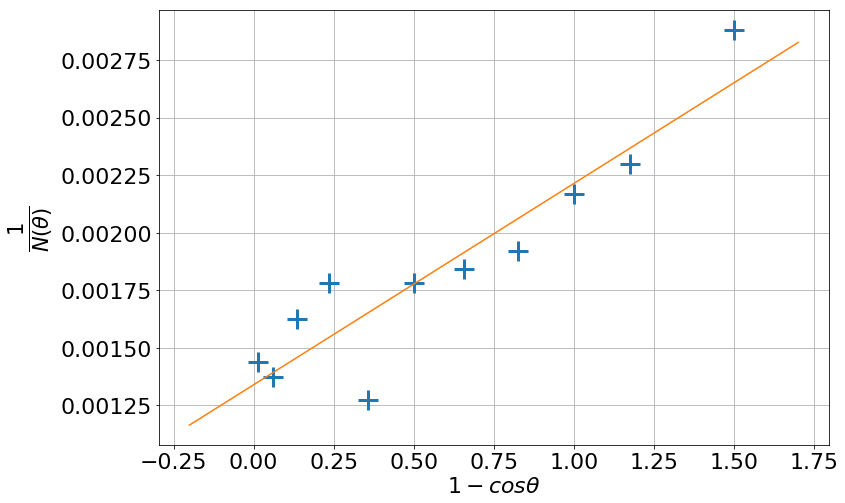

Оптимальная оценка дисперсии в нашей ленейной регресиионной модели состовляет 0.00013231426363827969

Соответсвенно из графкиа находим, что N(0) = 746 с ошибкой 73 и N(90) = 451 с ошибкой 26
Относительная погрешность соответсвенно сотовляет порядка 0.08
Отсюда по формуле (4) находим, что энергия покоя частицы на которых рассеивается излучение равна 480 кэВ
Ошибка измерения равна 74 кэВ


In [52]:
data = pd.read_csv("Measurments.csv")
print(data)
N = data.values[:,1]
angle = data.values[:,0]
x = -np.cos(angle *pi / 180) + 1
#print(np.cos(pi))
y = 1/N
plt.plot(x, y, '+')
f = interpolate(x, y)
grid = np.linspace(-0.2, 1.7)
plt.plot(grid, f(grid))
plt.xlabel(r"$1-cos\theta$")
plt.ylabel(r"$\frac{1}{N(\theta)}$", fontsize=30)
plt.show()
N_90 = int(1 / f(1))
N_0 = int(1 / f(0))
sigma = np.linalg.norm(y - f(x), 1) / y.size
delta_90 = int(N_90**2 * sigma) 
delta_0 = int(N_0**2 * sigma)
print("Оптимальная оценка дисперсии в нашей ленейной регресиионной модели состовляет {}".format(sigma))
print("\nСоответсвенно из графкиа находим, что N(0) = {} с ошибкой {} и N(90) = {} с ошибкой {}".\
      format(int(1 / f(0)), delta_0, int(1 / f(1)), delta_90))
print("Относительная погрешность соответсвенно сотовляет порядка {}".format(round((delta_0 / N_0 + delta_90 / N_90)/2, 2)))  
print("Отсюда по формуле (4) находим, что энергия покоя частицы на которых рассеивается излучение равна {} кэВ".\
      format(480))
print("Ошибка измерения равна {} кэВ".format(int(480 * (delta_0 / N_0 + delta_90 / N_90))))

Заметим, что у электронов энергия покоя как раз состовляет где-то 511 кэВ. Поэтому результаты эксперемента хорошо согласуются с теорией.

**График с ЭВМ для разлчиных углов рассеяния**
<img src="1.jpg" width=350>